In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels.formula.api as smf

from scipy.stats import pearsonr
import wget as wg

In [63]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=67c7b510a0602a2535500e811c1dd35655f9299a2f6ad108fdbddd9db07ccf88
  Stored in directory: /Users/darinavolkova/Library/Caches/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [ ]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
           'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
           'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
           'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [13]:
data = pd.read_table('/Users/darinavolkova/Downloads/imports-85.data', sep = ',', names = headers )
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [43]:
#Загрузка данных в фрейм данных pandas
cars = pd.DataFrame(data)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [47]:
#Исключим текстовые столбцы для удобства дальнейшей работы
cars = cars.drop(columns = ['normalized-losses','fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'])
cars.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [48]:
#Заменим слова в столбце num-of-doors на числа
cars = cars.replace('four', 4)
cars = cars.replace('two', 2)
cars.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


<AxesSubplot:ylabel='make'>

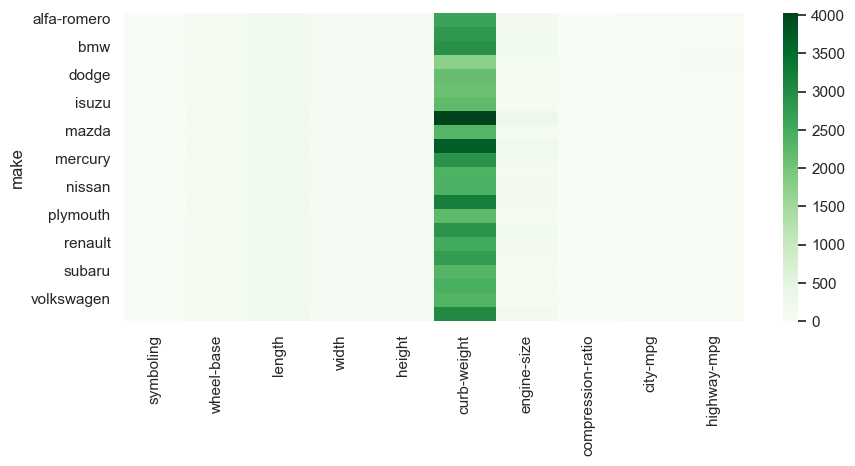

In [25]:
#Разведочный анализ по марке машин
heatmap = data.groupby(by='make').mean() 
plt.subplots(figsize=(10,4))
sns.heatmap(heatmap, cmap="Greens")

/Users/darinavolkova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


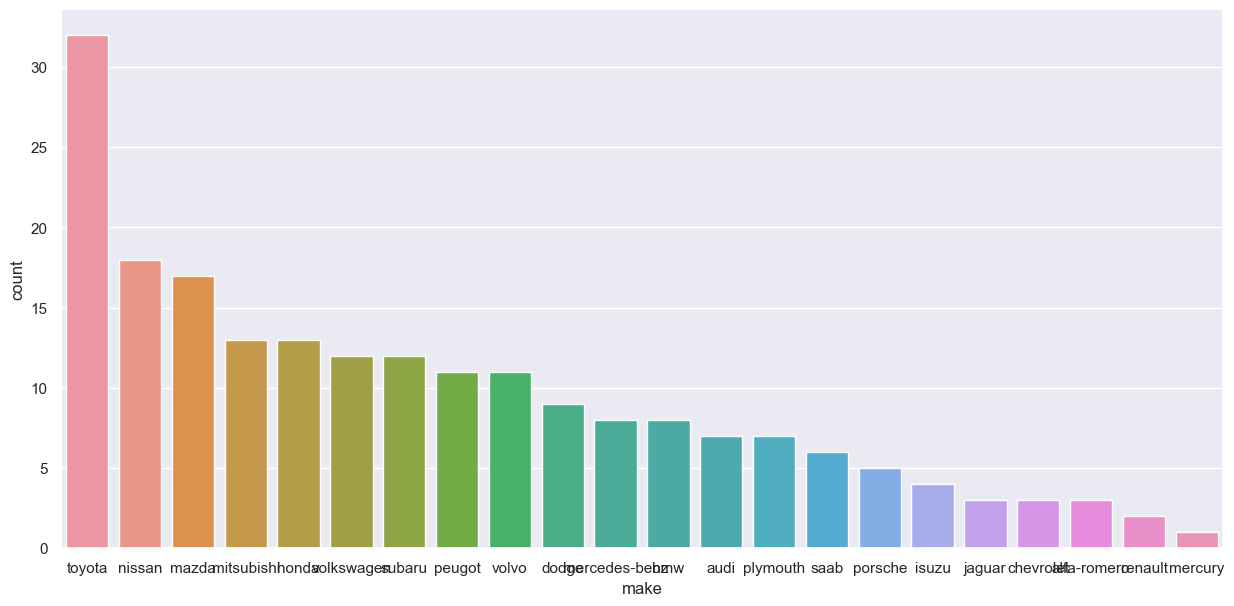

In [44]:
#Показатели, отсортированные согласно маркам машин
sns.countplot(cars['make'], label="Count", order = cars['make'].value_counts().index) 
plt.show()

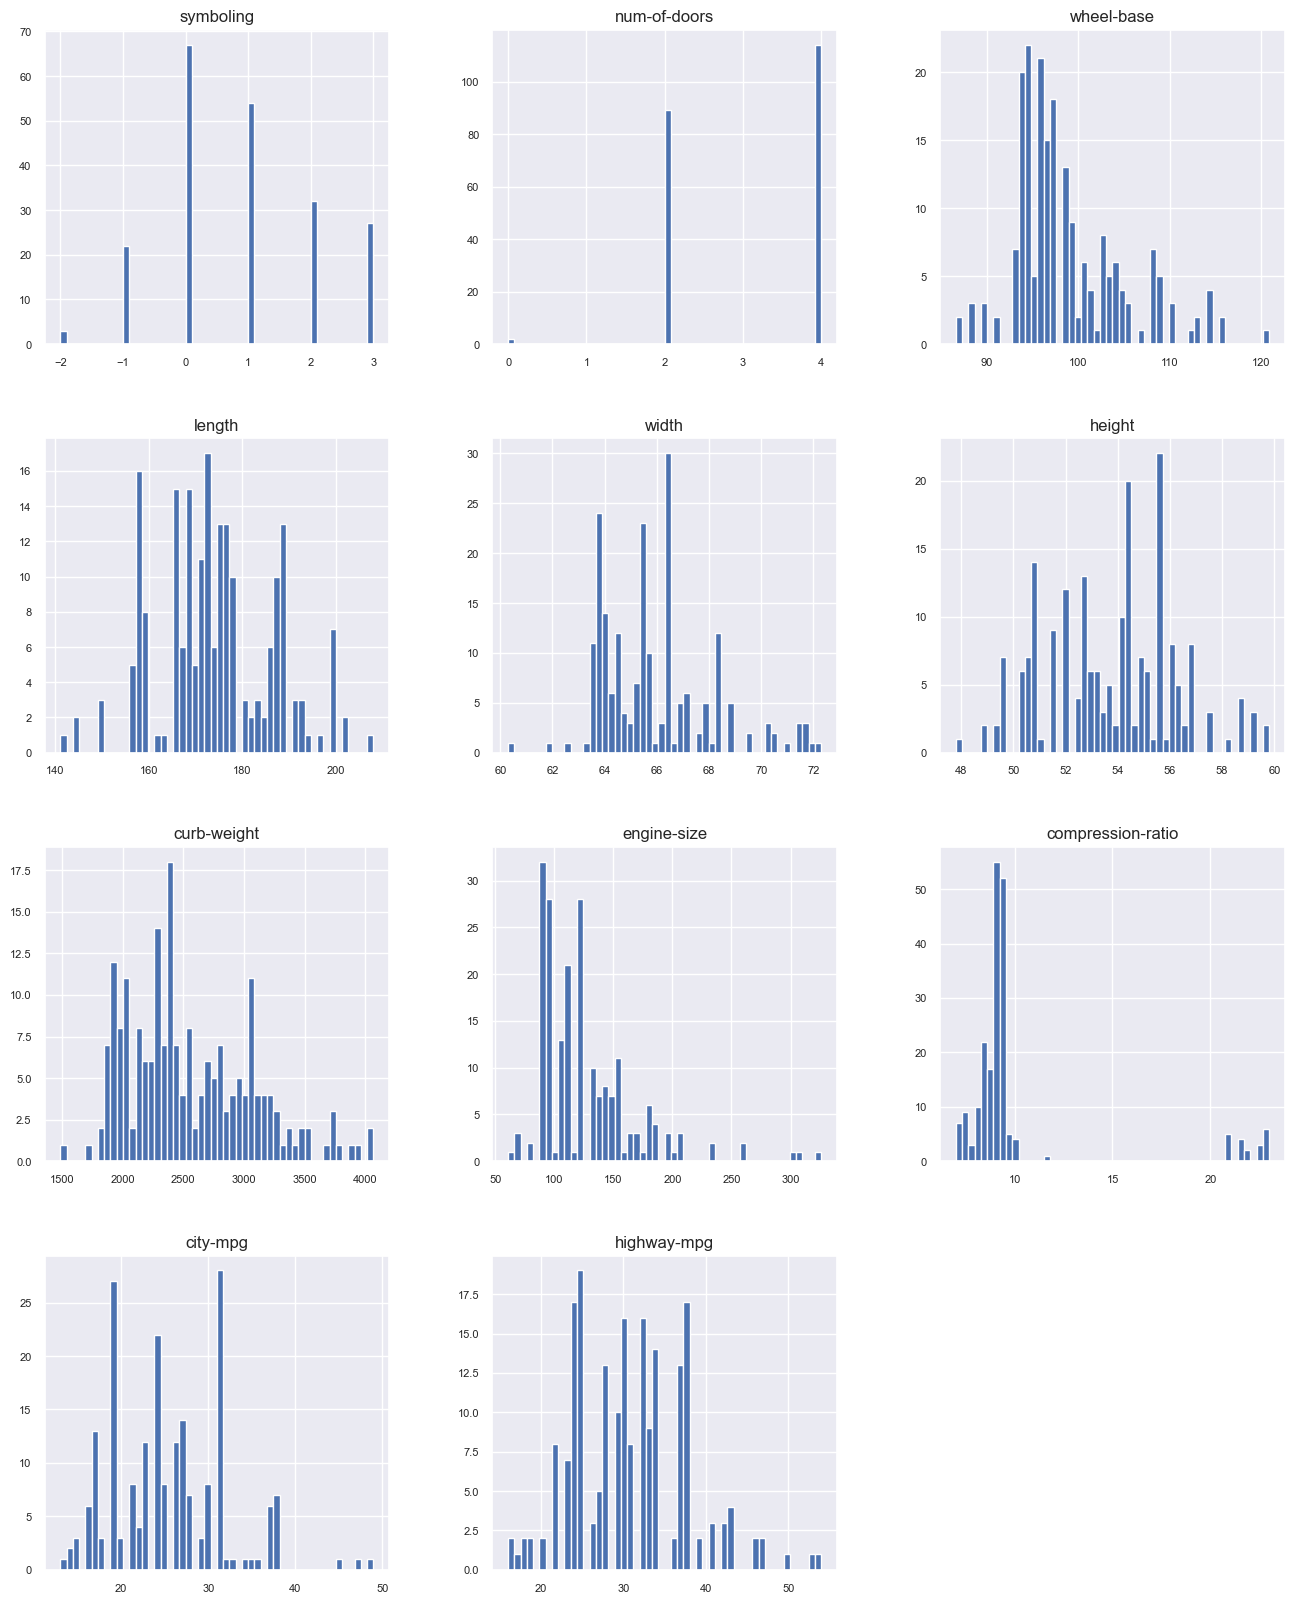

In [58]:
cars.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

<AxesSubplot:>

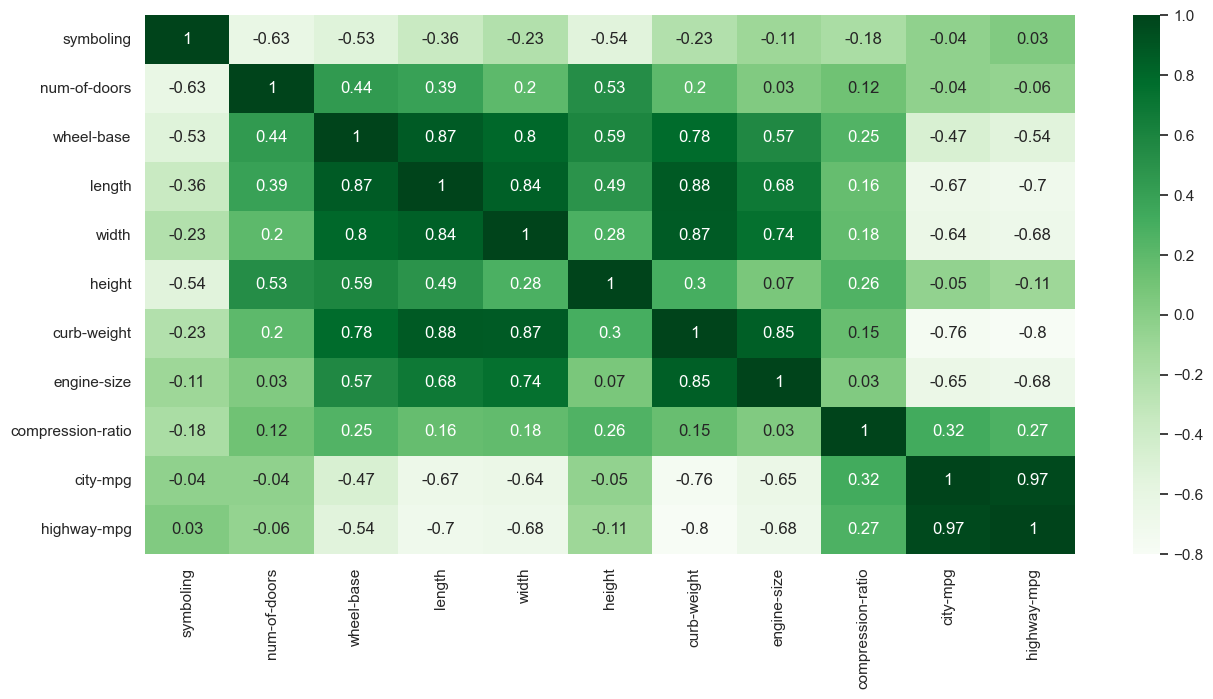

In [51]:
#Матрица корреляции
corr_matrix = cars.corr().round(2)
# annot - показатели будут находиться внутри квадратов, чтобы легче выявить функции,
                                        #на основе которых будет проводиться анализ
sns.heatmap(data = corr_matrix, annot = True, cmap='Greens')

Из матрицы корреляции видно, что наилучшее положительное значение у city-mpg и highway-mpg, а наихудшая (наиболее отрицательная) у curb-weight и highway-mpg, поэтому будем анализировать их

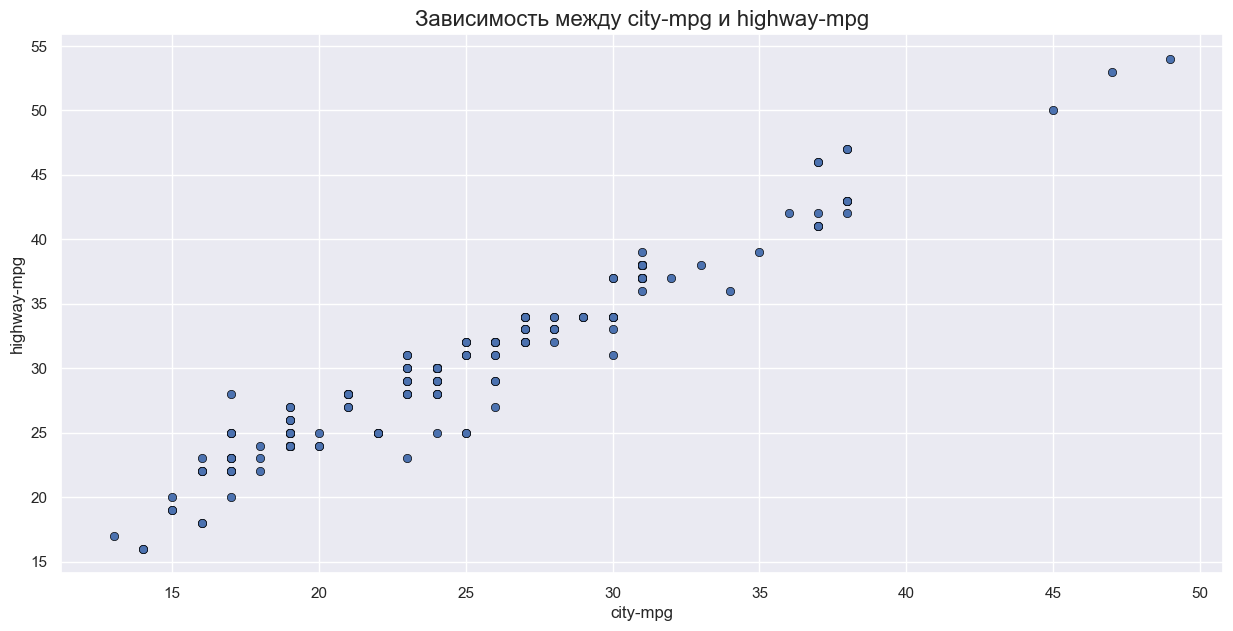

In [38]:
sns.set_style('darkgrid')
plt.title('Зависимость между city-mpg и highway-mpg', size=16)
plt.xlabel('city-mpg',size=12)
plt.ylabel('highway-mpg',size=12)
sns.scatterplot(x = 'city-mpg', y = 'highway-mpg', data = cars, edgecolor='black', palette='cubehelix')
plt.show()

Чем больше миль на галлон-шоссе, тем больше миль на галлон город

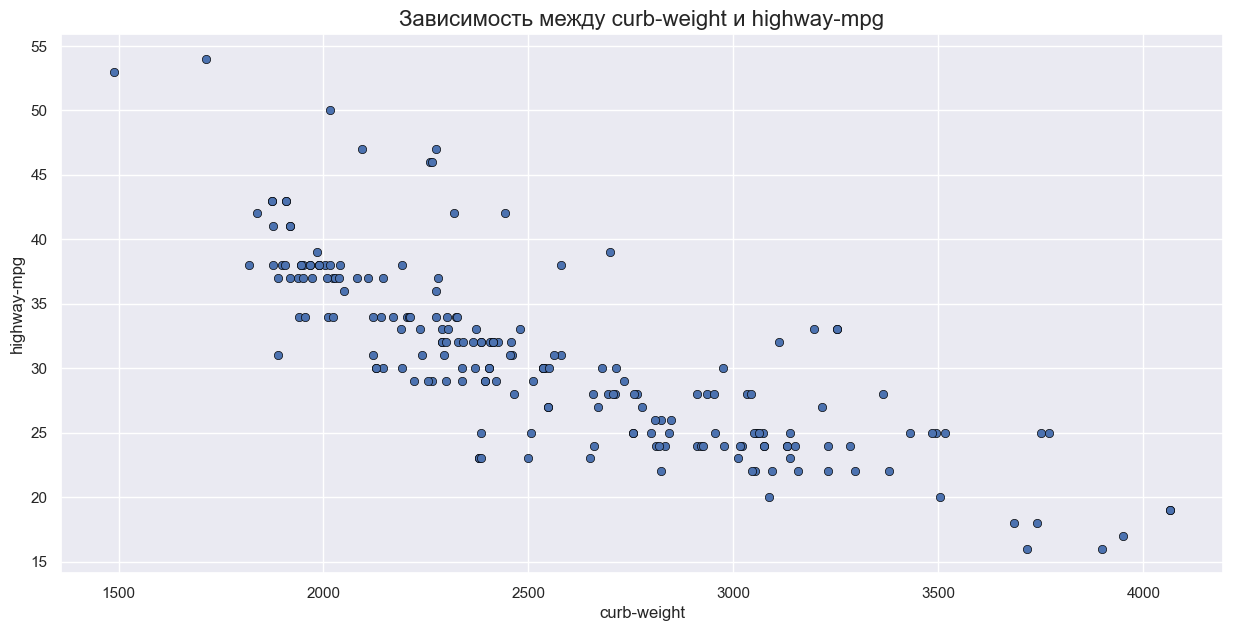

In [39]:
sns.set_style('darkgrid')
plt.title('Зависимость между curb-weight и highway-mpg', size=16)
plt.xlabel('curb-weight',size=12)
plt.ylabel('highway-mpg',size=12)
sns.scatterplot(x = 'curb-weight', y = 'highway-mpg', data = cars, edgecolor='black', palette='cubehelix')
plt.show()

Чем больше миль на галлон-шоссе, тем меньше совокупная масса автомобиля с водителем

<AxesSubplot:ylabel='Frequency'>

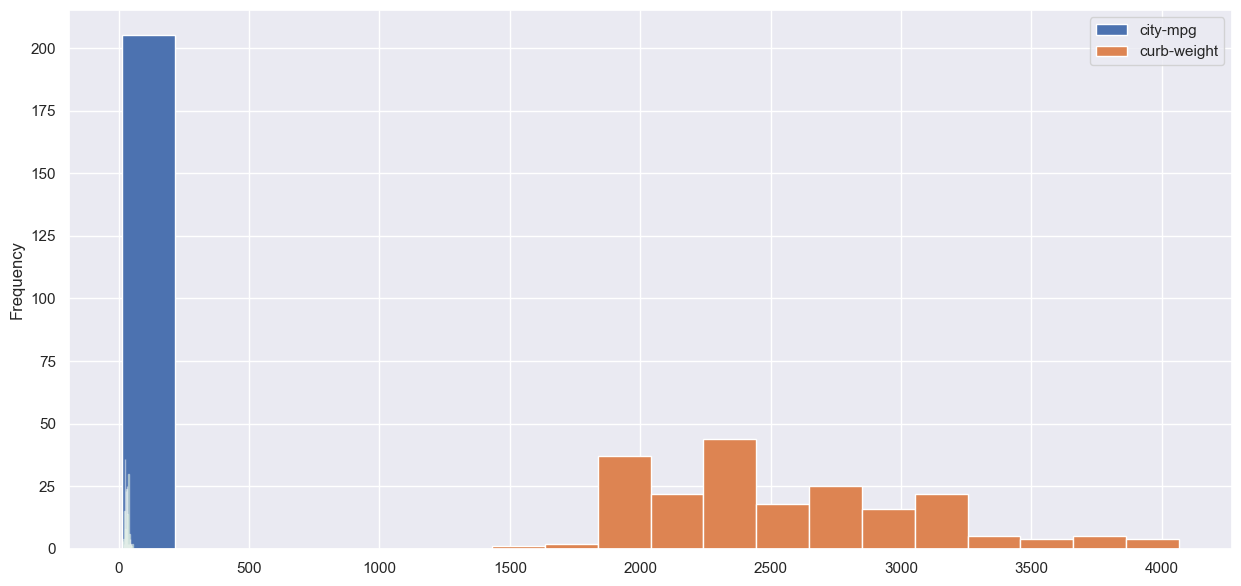

In [55]:
cars[['city-mpg', 'curb-weight']].plot(kind='hist',bins=20,alpha=1)
cars['highway-mpg'].plot(kind='hist',bins=20,alpha=0.5)

<AxesSubplot:>

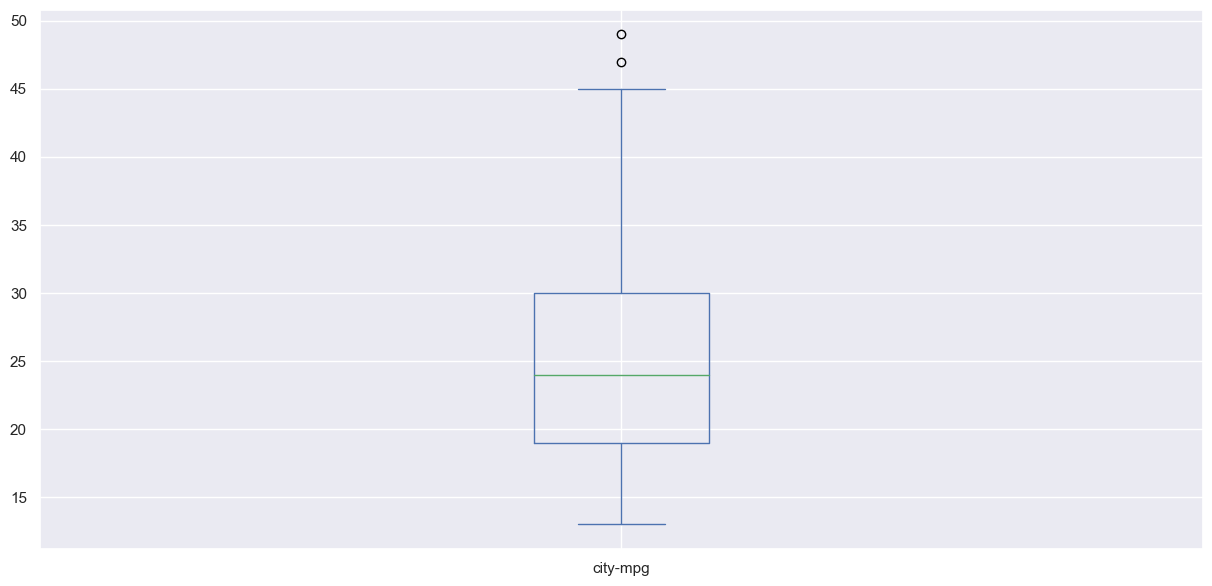

In [54]:
cars['city-mpg'].plot(kind='box') #2 аномалии

<AxesSubplot:>

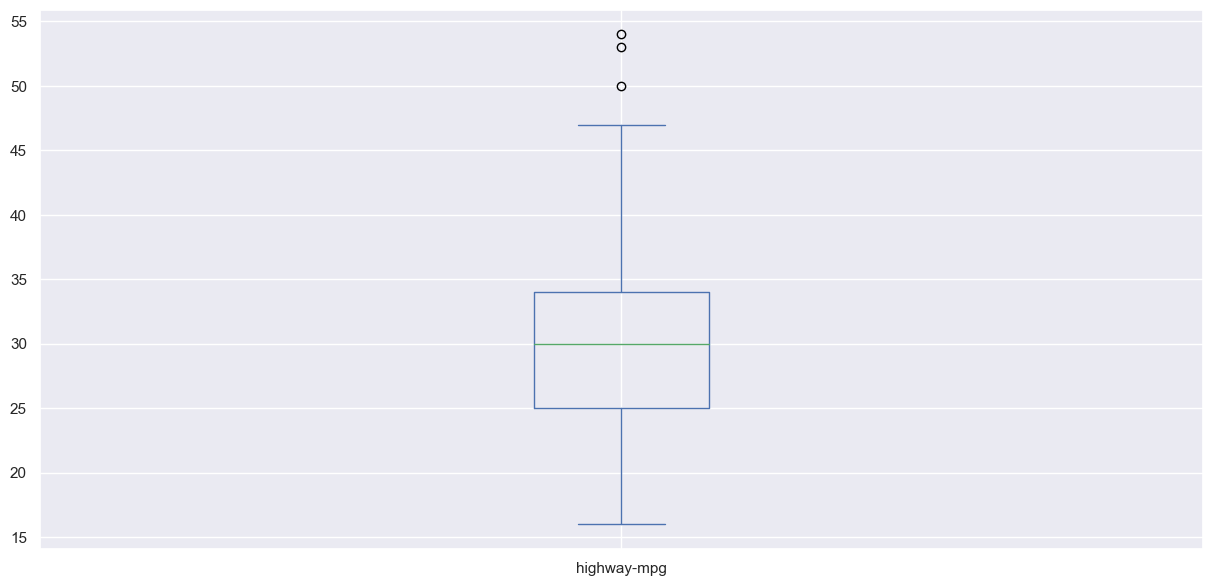

In [56]:
cars['highway-mpg'].plot(kind='box') #3 аномалии

<AxesSubplot:>

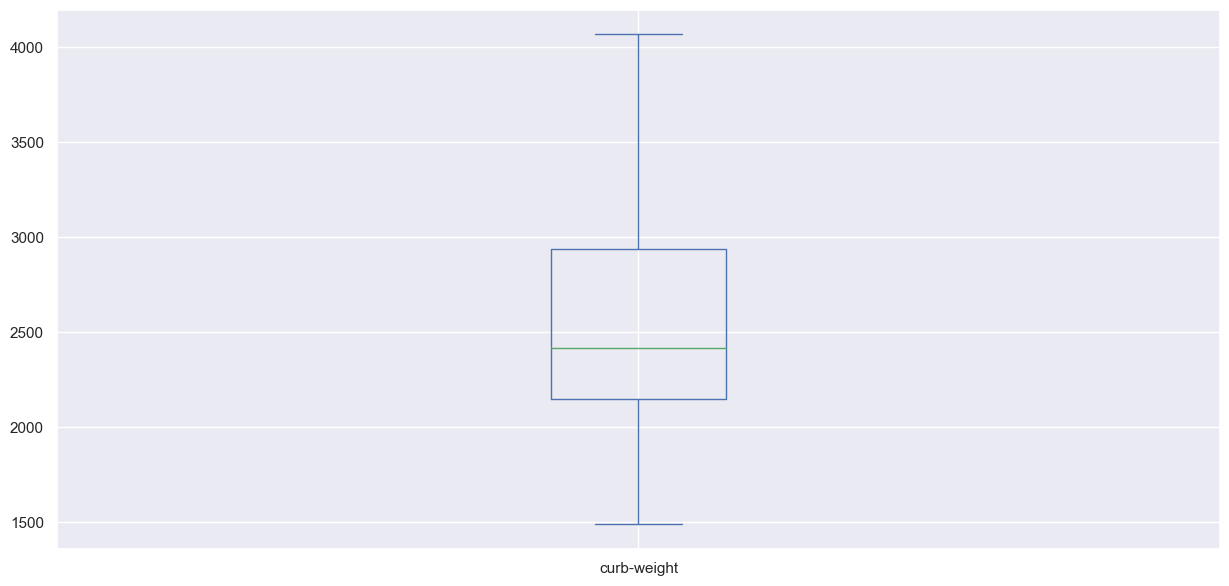

In [57]:
cars['curb-weight'].plot(kind='box') #аномалий нет

In [45]:
cars = cars.drop(columns = ['make'])

In [50]:
cars = cars.replace('?', 0)

/Users/darinavolkova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


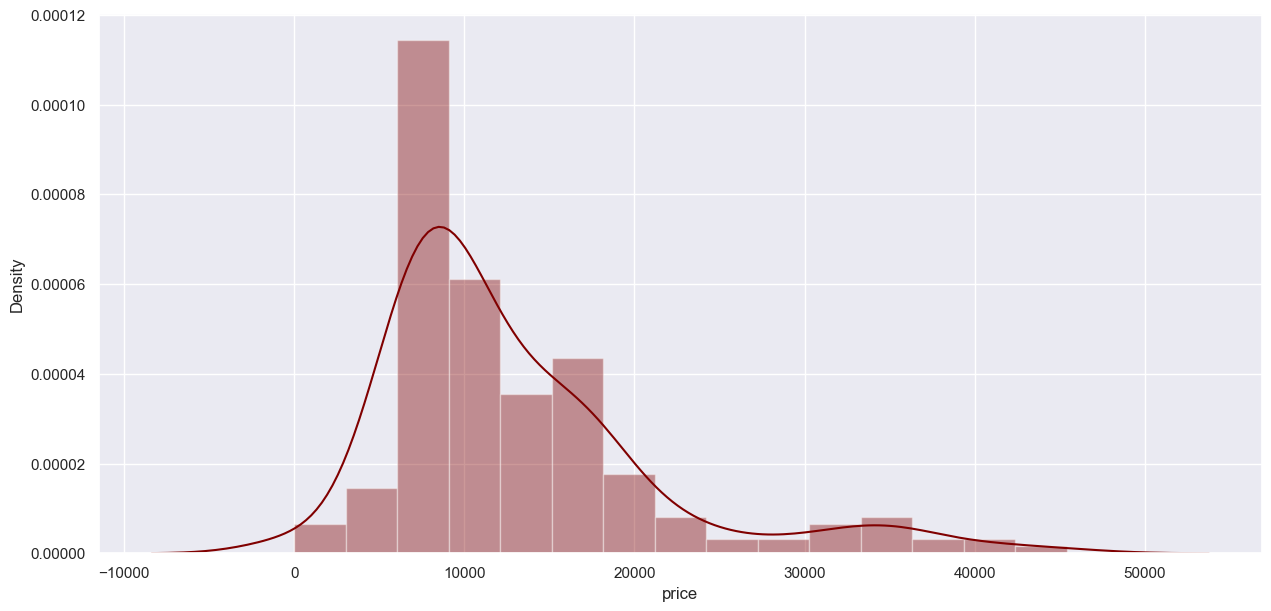

In [35]:
#разведочный анализ данных от цены
sns.set(rc={'figure.figsize':(15, 7)})
sns.axes_style('whitegrid')
sns.distplot(cars['price'], bins = 15, color = 'maroon')
plt.show()

Как видно на гистограмме больше всего машин со стоимостью в промежутке [0, 10000]